In [10]:
import sys
from pathlib import Path

# Ensure project root is on sys.path for imports like `from Backtester...`
PROJECT_ROOT = Path("/Users/akilfiros/Desktop/Projects/Side Projects /Quant-Backtesting").resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

print("Using project root:", PROJECT_ROOT)


Using project root: /Users/akilfiros/Desktop/Projects/Side Projects /Quant-Backtesting


In [11]:
from importlib import reload

import Strategy.mean_reversion as mr
reload(mr)
from Strategy.mean_reversion import BollingerMeanReversionStrategy

import Strategy.moving_average as ma
reload(ma)
from Strategy.moving_average import MovingAverageCrossover

import Backtester.backtest as btmod
reload(btmod)
from Backtester.backtest import Backtest

print("Modules reloaded; classes imported.")


Modules reloaded; classes imported.


In [12]:
price_col = "EURUSD=X.Close"

if 'df' in globals():
    tmp = BollingerMeanReversionStrategy(window=20, num_std=2).generate_signals(df.copy(), price_col=price_col)
    print([c for c in tmp.columns if c.endswith("_Signal")])
else:
    print("Skipped sanity check: define a DataFrame `df` first.")


['EURUSD=X.Close_Signal']


In [ ]:
from pathlib import Path
from Reports.reporting import (
    plot_equity_curve,
    plot_drawdown,
    export_performance_summary,
    save_trade_log,
)

# Ensure you've already run a backtest and have `results` and `bt`
PROJECT_ROOT = Path("/Users/akilfiros/Desktop/Projects/Side Projects /Quant-Backtesting")
OUTDIR = PROJECT_ROOT / "Reports" / "outputs"
OUTDIR.mkdir(parents=True, exist_ok=True)

# File paths
EQUITY = OUTDIR / "equity_curve.png"
DRAWDOWN = OUTDIR / "drawdown.png"
SUMMARY = OUTDIR / "performance_summary.csv"
TRADES = OUTDIR / "trade_log.csv"
RESULTS_TS = OUTDIR / "results_timeseries.csv"

# Generate artifacts
plot_equity_curve(results, save_path=str(EQUITY))
plot_drawdown(results, save_path=str(DRAWDOWN))
export_performance_summary(results, save_csv_path=str(SUMMARY))
save_trade_log(bt.portfolio.get_trade_log(), str(TRADES))
results.to_csv(RESULTS_TS)

print("Saved to:", OUTDIR)
list(OUTDIR.iterdir())


Backtest test code for MovingAverageCrossover Strategy

Initial capital: $100000.00
Final Portfolio Value: $104305.80
Total return: 4.31
Total trades Executed: 28
         Date    Ticker Signal  Units     Price           Cost      Remaining  \
23 2024-07-22  EURUSD=X    BUY  87344  1.089918   95293.017955       0.139803   
24 2024-10-16  EURUSD=X   SELL  87344  1.088412            NaN   94971.304119   
25 2025-02-17  EURUSD=X    BUY  90451  1.048922   94970.893092       0.411027   
26 2025-08-19  EURUSD=X   SELL  90451  1.166834            NaN  105436.160796   
27 2025-09-09  EURUSD=X    BUY  89497  1.176914  105435.568402       0.592394   

          Revenue  
23            NaN  
24   94971.164316  
25            NaN  
26  105435.749768  
27            NaN  


<Axes: title={'center': 'Portfolio Value Over Time for EUR/USD'}, xlabel='Date'>

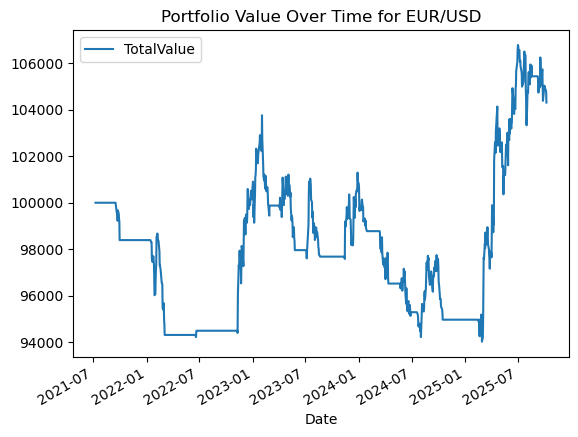

In [13]:
from Backtester.backtest import Backtest
from Strategy.moving_average import MovingAverageCrossover  # example
import pandas as pd

# Fetch data
df = pd.read_csv('/Users/akilfiros/Desktop/Projects/Side Projects /Quant-Backtesting/Data/market_data_features.csv')

df['Date.'] = pd.to_datetime(df['Date.'])
df.set_index('Date.', inplace=True)

# Create strategy instance
strategy = MovingAverageCrossover(short_window=20, long_window=50)

# Run backtest
bt = Backtest(df, strategy, ticker='EURUSD=X', initial_capital=100000)
results = bt.run()

# Show outputs
bt.summary()

# Optional: visualize performance
results[['TotalValue']].plot(title='Portfolio Value Over Time for EUR/USD')


Backtest test code for MomentumStrategy Strategy


Initial capital: $100000.00
Final Portfolio Value: $93734.14
Total return: -6.27
Total trades Executed: 92
         Date    Ticker Signal  Units     Price          Cost     Remaining  \
87 2025-09-11  EURUSD=X   SELL  80960  1.170344           NaN  94656.346814   
88 2025-09-12  EURUSD=X    BUY  80582  1.173475  94655.506366      0.840449   
89 2025-09-26  EURUSD=X   SELL  80582  1.166276           NaN  93887.710464   
90 2025-09-29  EURUSD=X    BUY  80109  1.170823  93887.260963      0.449501   
91 2025-10-06  EURUSD=X   SELL  80109  1.171248           NaN  93734.143837   

         Revenue  
87  94656.260227  
88           NaN  
89  93886.870015  
90           NaN  
91  93733.694336  


<Axes: title={'center': 'Portfolio Value Over Time '}, xlabel='Date'>

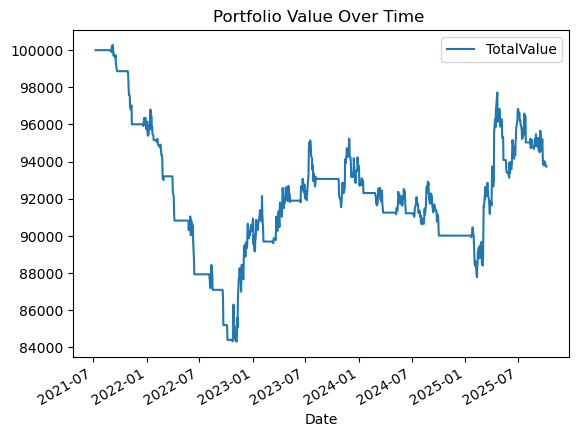

In [14]:
from Backtester.backtest import Backtest
from Strategy.momentum import MomentumStrategy  # example
import pandas as pd

# Fetch data
df = pd.read_csv('/Users/akilfiros/Desktop/Projects/Side Projects /Quant-Backtesting/Data/market_data_features.csv')

df['Date.'] = pd.to_datetime(df['Date.'])
df.set_index('Date.', inplace=True)

strategy = MomentumStrategy(lookback=20)
bt = Backtest(df, strategy, ticker='EURUSD=X', initial_capital=100000)
results = bt.run()

bt.summary()

results[['TotalValue']].plot(title='Portfolio Value Over Time ')


Backtest test code for MeanReversion Strategy

Initial capital: $100000.00
Final Portfolio Value: $105247.49
Total return: 5.25
Total trades Executed: 28
         Date    Ticker Signal  Units     Price           Cost      Remaining  \
23 2025-03-05  EURUSD=X   SELL  93439  1.062699            NaN   99198.310349   
24 2025-05-13  EURUSD=X    BUY  89314  1.109558   99198.139731       0.170618   
25 2025-06-13  EURUSD=X   SELL  89314  1.160025            NaN  103503.079592   
26 2025-07-30  EURUSD=X    BUY  89516  1.155095  103502.839092       0.240500   
27 2025-09-09  EURUSD=X   SELL  89516  1.176914            NaN  105247.487423   

          Revenue  
23   99198.264007  
24            NaN  
25  103502.908974  
26            NaN  
27  105247.246923  


<Axes: title={'center': 'Portfolio Value Over Time for EUR/USD '}, xlabel='Date'>

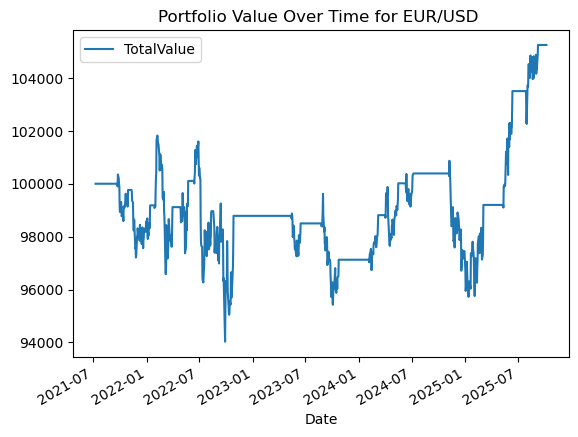

In [15]:
from Backtester.backtest import Backtest
from Strategy.mean_reversion import BollingerMeanReversionStrategy  # example
import pandas as pd

# Fetch data
df = pd.read_csv('/Users/akilfiros/Desktop/Projects/Side Projects /Quant-Backtesting/Data/market_data_features.csv')

df['Date.'] = pd.to_datetime(df['Date.'])
df.set_index('Date.', inplace=True)

strategy = BollingerMeanReversionStrategy(window=20,num_std=2)

bt = Backtest(df, strategy, ticker='EURUSD=X', initial_capital=100000)
results = bt.run()

bt.summary()

results[['TotalValue']].plot(title='Portfolio Value Over Time for EUR/USD ')


